In [31]:
from Environment import FoolGame, GameState, GameTreeNode

import numpy as np
import random
import matplotlib.pyplot as plt

import logging

In [32]:
infoLogger = logging.getLogger(__name__)
infoLogger.setLevel(logging.INFO)
py_handler = logging.FileHandler(f"{__name__}.log", mode='w')
py_formatter = logging.Formatter("%(name)s %(asctime)s %(levelname)s %(message)s")

py_handler.setFormatter(py_formatter)
infoLogger.addHandler(py_handler)

In [33]:
names = {0: '6', 1: '7', 2: '8', 3: '9', 4: '10', 5: "jack", 6: "queen",
             7: "king", 8: "ace"}
game = FoolGame(36, 4, 6, 3, names=names)
game.redo()

In [34]:
game.step(24, save=True)
print(game.state_history.restore(-1).get_state())


{'players_banks': [[(19, {'power': '7', 'type': 2}, {'power': 1, 'type': 2}, array([1, 0, 0, 0, 1, 0])), (7, {'power': 'king', 'type': 0}, {'power': 7, 'type': 0}, array([0, 0, 1, 0, 0, 0])), (14, {'power': 'jack', 'type': 1}, {'power': 5, 'type': 1}, array([0, 1, 0, 1, 1, 0])), (34, {'power': 'king', 'type': 3}, {'power': 7, 'type': 3}, array([1, 1, 1, 0, 0, 0])), (8, {'power': 'ace', 'type': 0}, {'power': 8, 'type': 0}, array([0, 0, 1, 0, 0, 1])), (11, {'power': '8', 'type': 1}, {'power': 2, 'type': 1}, array([0, 1, 0, 0, 1, 1]))], [(35, {'power': 'ace', 'type': 3}, {'power': 8, 'type': 3}, array([1, 1, 1, 0, 0, 1])), (20, {'power': '8', 'type': 2}, {'power': 2, 'type': 2}, array([1, 0, 0, 0, 1, 1])), (4, {'power': '10', 'type': 0}, {'power': 4, 'type': 0}, array([0, 0, 0, 1, 0, 1])), (28, {'power': '7', 'type': 3}, {'power': 1, 'type': 3}, array([1, 1, 0, 0, 1, 0])), (32, {'power': 'jack', 'type': 3}, {'power': 5, 'type': 3}, array([1, 1, 0, 1, 1, 0])), (31, {'power': '10', 'type': 

In [35]:
def create_observations(state: dict) -> tuple[np.ndarray, np.ndarray]:
    player_num = state["round"] % len(state["players_banks"])
    num_players = len(state['players_banks'])
    observations = np.zeros((36, num_players + 4)) # + функция мощности
    for card in state['players_banks'][player_num]:
        observations[card[0]][0] = 1
    for i, bank in enumerate(state['players_info']):
        if i != player_num:
            if i > player_num:
                k = i - player_num
            else:
                k = num_players + i - player_num
            for card in bank:
                observations[card[0]][k] = 1

    result = np.zeros((num_players + 6, 5, 10))
    result[:num_players + 3, 4, 9] = np.ones_like(result[:num_players + 3, 4, 9])
    result[num_players + 5, 4, 9] = 1
    result[num_players + 4, 4, 9] = 1

    for card in state['table']:
        observations[card[0]][num_players] = 1
        result[num_players + 4, :4, card[2]['power']] = 1
    for card in state['bita']:
        observations[card[0]][num_players + 1] = 1
    for card in state['target']:
        observations[card[0]][num_players + 2] = 1
        result[num_players + 5, card[2]['type'], card[2]['power']+1:-1] = 1
        result[num_players + 4, :4, card[2]['power']] = 1
    if len(state['target']) == 0 and len(state['table']) == 0 and state['role'] == 0:
        result[num_players + 4, :4, :9] = np.ones_like(result[num_players + 4, :4, :9])
        result[num_players + 4, 4, 9] = 0

    x_vals = np.array([0.5, 1.5, 2.5, 3.5])
    y_vals = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
    grid_points = np.array([[x, y] for x in x_vals for y in y_vals])
    x_grid = grid_points[:, 0]
    y_grid = grid_points[:, 1]
    func1 = lambda x, y: -0.5*y+10
    func2 = lambda x, y: 0.5*np.cos(x*np.pi + np.pi/2)**2
    func3 = lambda x, y: np.where((game.cosir[2]['type'] < x) & (game.cosir[2]['type'] + 1 > x), 10 + (func1(x, -y)) * func2(x, y), 10 - (func1(x, y)) * func2(x, y))
    u_vals = func3(x_grid, y_grid)#.reshape(-1, 1)

    observations[:, num_players + 3] = u_vals

    observations = observations.T

    for y_idx in range(4):
        for x_idx in range(9):
            linear_idx = y_idx * 9 + x_idx
            result[:7, y_idx, x_idx] = observations[:, linear_idx]

    if state['role'] == 0:
        result[0, 4, 9] = 1
    else:
        result[num_players + 2, 4, 9] = 1

    x_vals = np.array([1, 2, 3, 4])
    y_vals = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
    grid_points = np.array([[x, y] for x in x_vals for y in y_vals] + [[0, 0]])
    return result, grid_points
print(game.state_history.restore(-1).get_state())
obs, grid = create_observations(game.state_history.restore(-1).get_state())
print(obs)

{'players_banks': [[(19, {'power': '7', 'type': 2}, {'power': 1, 'type': 2}, array([1, 0, 0, 0, 1, 0])), (7, {'power': 'king', 'type': 0}, {'power': 7, 'type': 0}, array([0, 0, 1, 0, 0, 0])), (14, {'power': 'jack', 'type': 1}, {'power': 5, 'type': 1}, array([0, 1, 0, 1, 1, 0])), (34, {'power': 'king', 'type': 3}, {'power': 7, 'type': 3}, array([1, 1, 1, 0, 0, 0])), (8, {'power': 'ace', 'type': 0}, {'power': 8, 'type': 0}, array([0, 0, 1, 0, 0, 1])), (11, {'power': '8', 'type': 1}, {'power': 2, 'type': 1}, array([0, 1, 0, 0, 1, 1]))], [(35, {'power': 'ace', 'type': 3}, {'power': 8, 'type': 3}, array([1, 1, 1, 0, 0, 1])), (20, {'power': '8', 'type': 2}, {'power': 2, 'type': 2}, array([1, 0, 0, 0, 1, 1])), (4, {'power': '10', 'type': 0}, {'power': 4, 'type': 0}, array([0, 0, 0, 1, 0, 1])), (28, {'power': '7', 'type': 3}, {'power': 1, 'type': 3}, array([1, 1, 0, 0, 1, 0])), (32, {'power': 'jack', 'type': 3}, {'power': 5, 'type': 3}, array([1, 1, 0, 1, 1, 0])), (31, {'power': '10', 'type': 

In [36]:
#print(obs)
#obs = obs.transpose((0, 2, 1))
print(obs.shape)
print(grid)

(9, 5, 10)
[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [1 8]
 [1 9]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [2 7]
 [2 8]
 [2 9]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [3 8]
 [3 9]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [4 6]
 [4 7]
 [4 8]
 [4 9]
 [0 0]]


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class MIONet2d(nn.Module):
    def __init__(self, nonlinear_dim, linear_dim, trunk_input_dim=2, latent_dim=64):
        super().__init__()
        self.latent_dim = latent_dim

        # Общая Branch сеть (для точек x, y ∈ координатной сетке)
        self.branch_general = nn.Sequential(
            nn.Conv2d(nonlinear_dim, 32, kernel_size=3, padding=1), nn.SELU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(32, latent_dim)
        )

        # Специальная линейная сеть для channel=0 и координаты (-1, -1)
        self.branch_lin = nn.Sequential(
            nn.Conv2d(linear_dim, 16, kernel_size=1, padding=0), #nn.SELU(),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(16, latent_dim)  # Только channel 0
        )

        # Trunk сеть
        self.trunk_net = nn.Sequential(
            nn.Linear(trunk_input_dim, 32), nn.ReLU(),
            nn.Linear(32, latent_dim)
        )

    def target_positions(self, lin_input):
        dots = []
        pos = torch.prod(lin_input, dim=1) # (B, H, W)
        for i in range(pos.shape[1] - 1):
            for j in range(pos.shape[2] - 1):
                dots.append(pos[:, i, j])
        dots.append(pos[:, -1, -1])
        return torch.stack(dots, dim=1)

    def forward(self, nonlinear_func, linear_func, coords):
        """
        nonlinear_func: (B, C1, H, W)
        linear_func: (B, C2, H, W)
        coords: (B, N, 2) — (x, y) координаты
        Returns:
            Q-values: (B, N)
        """
        B, N, _ = coords.shape

        # --- Nonlinear branch (f1,...,fn) ---
        nonlinear_out = self.branch_general(nonlinear_func)  # (B, latent_dim)
        nonlinear_out = nonlinear_out.unsqueeze(1).expand(-1, N, -1)  # (B, N, latent_dim)

        # --- Linear branch (h1,...,hn)
        linear_out = self.branch_lin(linear_func)  # (B, latent_dim)
        linear_out = linear_out.unsqueeze(1).expand(-1, N, -1)  # (B, 1, latent_dim)

        #gen_branch = torch.cat([nonlinear_out, linear_out], dim=1)
        # --- Trunk сеть ---
        coords_flat = coords.view(B * N, -1)  # (B * N, 2)
        trunk_out = self.trunk_net(coords_flat).view(B, N, -1)  # (B, N, latent_dim)

        # --- Masking ---
        target_positions = self.target_positions(linear_func)

        # --- Point-wise product + Sum ---
        q_vals = target_positions * torch.sum(nonlinear_out * linear_out * trunk_out, dim=-1)  # (B, N)

        return F.relu(q_vals) + target_positions * 0.001

class MIONet3d(nn.Module):
    def __init__(self, nonlinear_dim, linear_dim, trunk_input_dim=3, latent_dim=64):
        super().__init__()
        self.latent_dim = latent_dim

        # Общая Branch сеть (для точек x, y ∈ координатной сетке)
        self.branch_general = nn.Sequential(
            nn.Conv2d(nonlinear_dim, 32, kernel_size=3, padding=1), nn.SELU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(32, latent_dim)
        )

        # Специальная линейная сеть для channel=0 и координаты (-1, -1)
        self.branch_lin = nn.Sequential(
            nn.Conv2d(linear_dim, 16, kernel_size=1, padding=0), #nn.SELU(),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(16, latent_dim)  # Только channel 0
        )

        # Trunk сеть
        self.trunk_net = nn.Sequential(
            nn.Linear(trunk_input_dim, 32), nn.ReLU(),
            nn.Linear(32, latent_dim)
        )

    def target_positions(self, lin_input):
        dots = []
        pos = torch.prod(lin_input, dim=1) # (B, H, W)
        for i in range(pos.shape[1] - 1):
            for j in range(pos.shape[2] - 1):
                dots.append(pos[:, i, j])
        dots.append(pos[:, -1, -1])
        return torch.stack(dots, dim=1)

    def forward(self, nonlinear_func, linear_func, coords):
        """
        nonlinear_func: (B, C1, H, W)
        linear_func: (B, C2, H, W)
        coords: (B, N, 2) — (x, y) координаты
        Returns:
            Q-values: (B, N)
        """
        B, N, _ = coords.shape

        # --- Nonlinear branch (f1,...,fn) ---
        nonlinear_out = self.branch_general(nonlinear_func)  # (B, latent_dim)
        nonlinear_out = nonlinear_out.unsqueeze(1).expand(-1, N, -1)  # (B, N, latent_dim)

        # --- Linear branch (h1,...,hn)
        linear_out = self.branch_lin(linear_func)  # (B, latent_dim)
        linear_out = linear_out.unsqueeze(1).expand(-1, N, -1)  # (B, 1, latent_dim)

        #gen_branch = torch.cat([nonlinear_out, linear_out], dim=1)
        # --- Trunk сеть ---
        coords_flat = coords.view(B * N, -1)  # (B * N, 2)
        trunk_out = self.trunk_net(coords_flat).view(B, N, -1)  # (B, N, latent_dim)

        # --- Masking ---
        target_positions = self.target_positions(linear_func)

        # --- Point-wise product + Sum ---
        q_vals = target_positions * torch.sum(nonlinear_out * linear_out * trunk_out, dim=-1)  # (B, N)

        return F.relu(q_vals) + target_positions * 0.001


In [38]:
def create_lin_tensor(obs, role):
    if role == 0:
        return torch.tensor(np.concatenate([obs[0:1, :, :], obs[7:8, :, :]], axis=0), dtype=torch.float32)
    else:
        return torch.tensor(np.concatenate([obs[0:1, :, :], obs[8:9, :, :]], axis=0), dtype=torch.float32)

def create_nonlin_tensor(obs, role):
    if role == 0:
        return torch.tensor(np.concatenate([obs[1:7, :, :], obs[8:9, :, :]], axis=0), dtype=torch.float32)
    else:
        return torch.tensor(obs[1:8, :, :], dtype=torch.float32)

def target_positions(lin_input):
    dots = []
    pos = torch.prod(lin_input, dim=1) # (B, H, W)
    for i in range(pos.shape[1] - 1):
        for j in range(pos.shape[2] - 1):
            dots.append(pos[:, i, j])
    dots.append(pos[:, -1, -1])
    return torch.stack(dots, dim=1)

nonlinear_input = create_nonlin_tensor(obs, 0).unsqueeze(0)
linear_input = create_lin_tensor(obs, 0).unsqueeze(0)
coords_input = torch.tensor(grid, dtype=torch.float32).unsqueeze(0)
print(nonlinear_input.size())
print(linear_input)
print(coords_input.size())
print(target_positions(linear_input))

torch.Size([1, 7, 5, 10])
tensor([[[[0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
          [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],

         [[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]]])
torch.Size([1, 37, 2])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1.]])


In [39]:
def find_q_approx(game: FoolGame, player_num, pred_modelA: torch.nn.Module, pred_modelD: torch.nn.Module, verbose=False) -> tuple[float, bool]:
    infoLogger.info(f"find_q_approx {player_num} player, role: {game.role}") if verbose else None

    step_count = 0
    while game.round % game.num_players != player_num:
        step_count += 1
        #infoLogger.debug(f"[Step {step_count}]")

        state = game.state_history.restore(-1).get_state()
        obs, grid = create_observations(state)

        nonlinear_input = create_nonlin_tensor(obs, state['role']).unsqueeze(0).to(torch.device('cuda:0'))
        linear_input = create_lin_tensor(obs, state['role']).unsqueeze(0).to(torch.device('cuda:0'))
        coords_input = torch.tensor(grid, dtype=torch.float32).unsqueeze(0).to(torch.device('cuda:0'))

        model = pred_modelA if game.role == 0 else pred_modelD
        Q_values = model(nonlinear_input, linear_input, coords_input)
        action = torch.argmax(Q_values).item()

        #infoLogger.debug(f"[Step {step_count}] Opponent chosen {action} with Q={Q_values[0, action].item():.4f}")
        _, not_terminal, _ = game.step(action)
        if not not_terminal:
            infoLogger.info(f"[Step {step_count}] Game ended.") if verbose else None
            return 0.0, False

    # Наступил ход нужного игрока
    #infoLogger.info(f"{player_num} turn. Approximating Q.")

    state = game.state_history.restore(-1).get_state()
    obs, grid = create_observations(state)

    nonlinear_input = create_nonlin_tensor(obs, state['role']).unsqueeze(0).to(torch.device('cuda:0'))
    linear_input = create_lin_tensor(obs, state['role']).unsqueeze(0).to(torch.device('cuda:0'))
    coords_input = torch.tensor(grid, dtype=torch.float32).unsqueeze(0).to(torch.device('cuda:0'))

    model = pred_modelA if game.role == 0 else pred_modelD
    Q_values = model(nonlinear_input, linear_input, coords_input)

    q_max = torch.max(Q_values).item()
    #infoLogger.info(f"Maximal Q-value for player {player_num}: {q_max:.4f}")

    return q_max, True


In [40]:
B, N = 256, 37
modelA = MIONet2d(7, 2).to(torch.device('cuda:0'))
weights = modelA.state_dict()
modelA_eval = MIONet2d(7, 2).to(torch.device('cuda:0'))
modelA_eval.load_state_dict(weights)
modelD = MIONet2d(7, 2).to(torch.device('cuda:0'))
weights = modelD.state_dict()
modelD_eval = MIONet2d(7, 2).to(torch.device('cuda:0'))
modelD_eval.load_state_dict(weights)

optimizerA = optim.Adam(modelA.parameters(), lr=0.0001)
optimizerD = optim.Adam(modelD.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 500
discounting = 0.98
lossesA = []
lossesD = []
games = [FoolGame(36, 4, 6, 3, names=names) for i in range(B)]
[game.redo() for game in games]

modelA.train()
modelD.train()
modelA_eval.eval()
modelD_eval.eval()

for epoch in range(epochs):
    infoLogger.info(f"epoch={epoch}")
    # Updating evaluation model weights
    if (epoch % 5 == 0 and epoch != 0) or epoch == 1:
        weights = modelA.state_dict()
        modelA_eval.load_state_dict(weights)
        weights = modelD.state_dict()
        modelD_eval.load_state_dict(weights)
        infoLogger.info(f"updating eval model weights")

    state_nonlinearA = []
    state_linearA = []

    state_nonlinearD = []
    state_linearD = []

    coords_input = None

    D_idxs = []
    A_idxs = []

    # Capturing observables from games
    infoLogger.info(f"capturing observables")
    for i, game in enumerate(games):
        state = game.state_history.restore(-1).get_state()
        obs, grid = create_observations(state)

        nonlinear_input = create_nonlin_tensor(obs, state['role']).unsqueeze(0)
        linear_input = create_lin_tensor(obs, state['role']).unsqueeze(0)
        if coords_input is None:
            coords_input = torch.tensor(grid, dtype=torch.float32).unsqueeze(0)

        if state['role'] == 0:
            state_nonlinearA.append(nonlinear_input)
            state_linearA.append(linear_input)
            A_idxs.append(i)
        else:
            state_nonlinearD.append(nonlinear_input)
            state_linearD.append(linear_input)
            D_idxs.append(i)
        if i % 50 == 0:
            infoLogger.info(f"game={i}")

    # Approximating Q-values
    if len(state_nonlinearA) > 0:
        t_state_nonlinearA = torch.cat(state_nonlinearA).to(torch.device('cuda:0'))#.detach()
        t_state_linearA = torch.cat(state_linearA).to(torch.device('cuda:0'))
        t_coords_inputA = coords_input.repeat(t_state_linearA.shape[0], 1, 1).to(torch.device('cuda:0'))#.detach()

        Q_valuesA = modelA(t_state_nonlinearA, t_state_linearA, t_coords_inputA)
        infoLogger.info(f"Approximating attacker Q values")

    if len(state_linearD) > 0:
        t_state_nonlinearD = torch.cat(state_nonlinearD).to(torch.device('cuda:0'))#.detach()
        t_state_linearD = torch.cat(state_linearD).to(torch.device('cuda:0'))
        t_coords_inputD = coords_input.repeat(t_state_linearD.shape[0], 1, 1).to(torch.device('cuda:0'))#.detach()

        Q_valuesD = modelD(t_state_nonlinearD, t_state_linearD, t_coords_inputD)
        infoLogger.info(f"Approximating defender Q values")

    # Applying Bellman formula
    h, m = 0, 0
    ngA = []
    ngD = []
    rewD = torch.zeros(len(state_linearD), 37).to(torch.device('cuda:0'))
    rewA = torch.zeros(len(state_linearA), 37).to(torch.device('cuda:0'))
    contA = []
    contD = []
    infoLogger.info(f"Applying Bellman formula")
    for i, game in enumerate(games):
        infoLogger.info(f"Bellman game={i}") if i % 50 == 0 else None
        verbose = True if i % 50 == 0 else False
        if i in D_idxs:
            Q_v = Q_valuesD[h, :] # [37]
            for j, q_val in enumerate(Q_v):
                if q_val > 1e-7 or q_val < 1e-7:
                    new_game: FoolGame = game.copy()
                    rew, cont, player_not_ended = new_game.step(j)
                    if player_not_ended and cont:
                        Q_next, cont = find_q_approx(new_game, game.round % game.num_players, modelA_eval, modelD_eval, verbose)
                        if cont:
                            rew += Q_next * discounting
                    rewD[h, j] = rew
                else:
                    rewD[h, j] = 0
            h += 1
        if i in A_idxs:
            Q_v = Q_valuesA[m, :] # [37]
            for j, q_val in enumerate(Q_v):
                if q_val > 1e-7 or q_val < 1e-7:
                    new_game: FoolGame = game.copy()
                    rew, cont, player_not_ended = new_game.step(j)
                    if player_not_ended and cont:
                        Q_next, cont = find_q_approx(new_game, game.round % game.num_players, modelA_eval, modelD_eval, verbose)
                        if cont:
                            rew += Q_next * discounting
                    rewA[m, j] = rew
                else:
                    rewA[m, j] = 0
            m += 1

    # Optimizing process
    infoLogger.info(f"Optimizing Q functions")
    if epoch >= 5:
        if len(state_linearA) > 0:
            optimizerA.zero_grad()
            loss = criterion(Q_valuesA, rewA)
            loss.backward()
            optimizerA.step()
            lossesA.append(loss.item())

        if len(state_linearD) > 0:
            optimizerD.zero_grad()
            loss = criterion(Q_valuesD, rewD)
            loss.backward()
            optimizerD.step()
            lossesD.append(loss.item())

    # Making eps -greedy moves
    infoLogger.info(f"Making \eps -greedy moves")
    h, m = 0, 0
    epsilon = 0.15
    new_games = []
    for i, game in enumerate(games):
        infoLogger.info(f"game={i}")
        if i in D_idxs:
            possible_actions = torch.nonzero(Q_valuesD[m, :]).tolist()
            #print("D:", torch.argmax(Q_valuesD[m, :], dim=0).item())
            if random.random() < epsilon:
                action = random.choice(possible_actions)[0]
            else:
                action = torch.argmax(Q_valuesD[m, :]).item()
            _, cont, _ = game.step(action)
            if cont:
                new_games.append(game)
            m += 1
        else:
            possible_actions = torch.nonzero(Q_valuesA[h, :]).tolist()
            #print("A:", torch.argmax(Q_valuesA[h, :], dim=0).item())
            if random.random() < epsilon:
                action = random.choice(possible_actions)[0]
            else:
                action = torch.argmax(Q_valuesA[h, :]).item()
            _, cont, _ = game.step(action)
            if cont:
                new_games.append(game)
            h += 1
    games = new_games
    added_games = [FoolGame(36, 4, 6, 3, names=names) for i in range(B - len(games))]
    [game.redo() for game in added_games]
    games += added_games

    print("epoch:", epoch)
    if len(lossesA) > 0:
        print("lossA:", lossesA[-1])
    if len(lossesD) > 0:
        print("lossD:", lossesD[-1])

plt.plot(np.arange(1, len(lossesA) + 1), lossesA)
plt.show()
plt.plot(np.arange(1, len(lossesD) + 1), lossesD)
plt.show()


<>:145: SyntaxWarning: invalid escape sequence '\e'
<>:145: SyntaxWarning: invalid escape sequence '\e'
C:\Users\User\AppData\Local\Temp\ipykernel_20380\119484865.py:145: SyntaxWarning: invalid escape sequence '\e'
  infoLogger.info(f"Making \eps -greedy moves")


epoch: 0
epoch: 1
epoch: 2
epoch: 3
lossA: 6.508867500087945e-06
lossD: 392.0909423828125
epoch: 4
lossA: 4.946963144902838e-06
lossD: 391.8468322753906
epoch: 5
lossA: 0.0026161959394812584
lossD: 403.92694091796875
epoch: 6
lossA: 0.002618033904582262
lossD: 403.83062744140625
epoch: 7
lossA: 0.002616105368360877
lossD: 403.7030029296875
epoch: 8
lossA: 0.0026127533055841923
lossD: 403.5677795410156
epoch: 9
lossA: 0.0026157167740166187
lossD: 403.3942565917969
epoch: 10
lossA: 0.09436704218387604
lossD: 467.41766357421875
epoch: 11
lossA: 0.09459181129932404
lossD: 466.7629089355469
epoch: 12
lossA: 0.09432388842105865
lossD: 466.90179443359375
epoch: 13
lossA: 0.0944424569606781
lossD: 466.5556335449219


KeyboardInterrupt: 

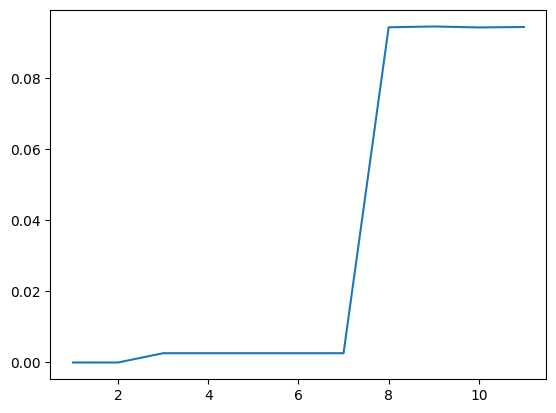

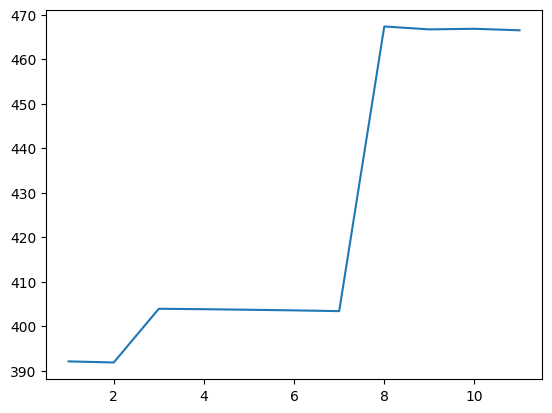

In [41]:
plt.plot(np.arange(1, len(lossesA) + 1), lossesA)
plt.show()
plt.plot(np.arange(1, len(lossesD) + 1), lossesD)
plt.show()

In [11]:
modelA.eval()

nonlinear_input = create_nonlin_tensor(obs, 0).unsqueeze(0).to(torch.device('cuda:0'))
linear_input = create_lin_tensor(obs, 0).unsqueeze(0).to(torch.device('cuda:0'))
coords_input = torch.tensor(grid, dtype=torch.float32).unsqueeze(0).to(torch.device('cuda:0'))
print(nonlinear_input.size())
print(linear_input)
print(coords_input.size())
print(target_positions(linear_input))

print(modelA(nonlinear_input, linear_input, coords_input).size())
print(modelA(nonlinear_input, linear_input, coords_input))

torch.Size([1, 7, 5, 10])
tensor([[[[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],

         [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]]], device='cuda:0')
torch.Size([1, 37, 2])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1.]], device='cuda:0')
torch.Size([1, 37])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 